In [1]:
import Pkg
Pkg.activate("../../.")


"/home/mark/devel/InterpolatedRejectionSampling/Project.toml"

In [2]:
X = range(0, π, length=10)
Y = range(0, π/4, length=9)
knots = (X,Y)
prob = [sin(x)+tan(y) for x in X, y in Y]

10×9 Array{Float64,2}:
 0.0          0.0984914  0.198912  0.303347  …  0.668179  0.820679  1.0    
 0.34202      0.440512   0.540933  0.645367     1.0102    1.1627    1.34202
 0.642788     0.741279   0.8417    0.946134     1.31097   1.46347   1.64279
 0.866025     0.964517   1.06494   1.16937      1.5342    1.6867    1.86603
 0.984808     1.0833     1.18372   1.28815      1.65299   1.80549   1.98481
 0.984808     1.0833     1.18372   1.28815   …  1.65299   1.80549   1.98481
 0.866025     0.964517   1.06494   1.16937      1.5342    1.6867    1.86603
 0.642788     0.741279   0.8417    0.946134     1.31097   1.46347   1.64279
 0.34202      0.440512   0.540933  0.645367     1.0102    1.1627    1.34202
 1.22465e-16  0.0984914  0.198912  0.303347     0.668179  0.820679  1.0    

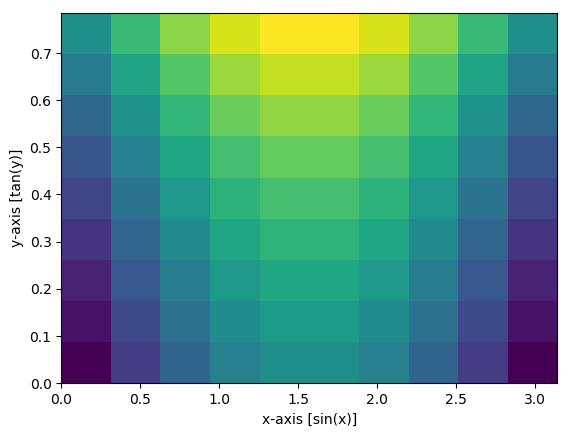

In [3]:
using PyPlot
imshow(transpose(prob);
       extent = (knots[1][1], knots[1][end], knots[2][1], knots[2][end]),
       aspect = "auto",
       origin = "lower")
ax = gca()
ax.set_xlabel("x-axis [sin(x)]")
ax.set_ylabel("y-axis [tan(y)]")
;

┌ Info: Recompiling stale cache file /home/mark/.julia/compiled/v1.1/InterpolatedRejectionSampling/Xklfj.ji for InterpolatedRejectionSampling [9608d442-472c-11e9-3e14-5b72dbacd115]
└ @ Base loading.jl:1184


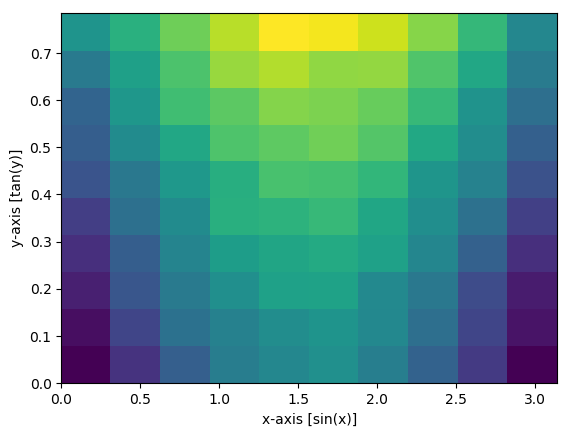

In [4]:
using InterpolatedRejectionSampling
n = 100_000
xy = irsample(knots,prob,n)
hist2D(xy[1,:],xy[2,:])
ax = gca()
ax.set_xlabel("x-axis [sin(x)]")
ax.set_ylabel("y-axis [tan(y)]")
;

## throw away every other x or y

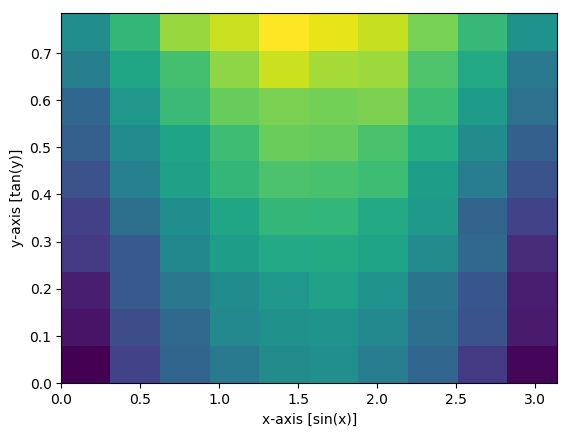

In [5]:
xy = convert(Matrix{Union{Missing,Float64}}, xy)
for i = 1:n
    if iseven(i)
        xy[1,i] = missing
    else
        xy[2,i] = missing
    end
end
irsample!(xy,knots,prob)
hist2D(xy[1,:],xy[2,:])
ax = gca()
ax.set_xlabel("x-axis [sin(x)]")
ax.set_ylabel("y-axis [tan(y)]")
;

## Benchmarking

In [6]:
using BenchmarkTools
for i = 1:n
    if iseven(i)
        xy[1,i] = missing
    else
        xy[2,i] = missing
    end
end
@benchmark irsample!(xy,knots,prob)

BenchmarkTools.Trial: 
  memory estimate:  107.72 KiB
  allocs estimate:  21
  --------------
  minimum time:     578.331 μs (0.00% GC)
  median time:      630.302 μs (0.00% GC)
  mean time:        744.237 μs (2.45% GC)
  maximum time:     80.901 ms (98.97% GC)
  --------------
  samples:          6656
  evals/sample:     1